## Practice: Fun with Word Embeddings (4 points total)

Today we gonna play with word embeddings: train our own little embeddings, load one from the gensim model zoo and use it to visualize text corpora.

This whole thing is gonna happen on top of an embedding dataset.

__Requirements:__  `pip install --upgrade nltk gensim bokeh`, but only if you're running locally.

**Please submit this notebook as part of your homework!**

In [ ]:
# download the data:
!wget https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1 -O ./quora.txt
# alternative download link: https://yadi.sk/i/BPQrUu1NaTduEw

--2025-10-27 15:50:22--  https://www.dropbox.com/s/obaitrix9jyu84r/quora.txt?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1 [following]
--2025-10-27 15:50:22--  https://www.dropbox.com/scl/fi/p0t2dw6oqs6oxpd6zz534/quora.txt?rlkey=bjupppwua4zmd4elz8octecy9&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc099e555134ec1e56139595ccd5.dl.dropboxusercontent.com/cd/0/inline/C0DocVjS7r8xnb8-o_nnlVHu4exchMWqPc5qF1ink_0DelzNBMFiKr6yjnpTvOUKaTa1NyxYTznMhu3RhXuNNK3owqeJNKvFhjCGY-AhWos2w5S8G4ipkMtftYp8q4VNjrQ/file?dl=1# [following]
--2025-10-27 15:50:22--  https://uc099e555134ec1e56139595ccd5.dl.dropboxusercontent.com/cd/0/inline/C0DocVjS7r8

In [ ]:
import numpy as np

with open("./quora.txt", encoding="utf-8") as file:
    data = list(file)

data[50]

"What TV shows or books help you read people's body language?\n"

__Tokenization:__ a typical first step for an NLP task is to split raw data into words.
The text we're working with is in raw format: with all the punctuation and emojis attached to some words, so a simple str.split won't do.

Let's use __`nltk`__ - a library that handles many NLP tasks like tokenization, stemming, or part-of-speech tagging.

In [ ]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

print(tokenizer.tokenize(data[50]))

['What', 'TV', 'shows', 'or', 'books', 'help', 'you', 'read', 'people', "'", 's', 'body', 'language', '?']


In [ ]:
# TASK: lowercase everything and extract tokens with tokenizer.
# data_tok should be a list of lists of tokens for each line in data.

data_tok = [tokenizer.tokenize(line.lower()) for line in data]


In [ ]:
assert all(isinstance(row, (list, tuple)) for row in data_tok), "please convert each line into a list of tokens (strings)"
assert all(all(isinstance(tok, str) for tok in row) for row in data_tok), "please convert each line into a list of tokens (strings)"
is_latin = lambda tok: all('a' <= x.lower() <= 'z' for x in tok)
assert all(map(lambda l: not is_latin(l) or l.islower(), map(' '.join, data_tok))), "please make sure to lowercase the data"

In [ ]:
print([' '.join(row) for row in data_tok[:2]])

["can i get back with my ex even though she is pregnant with another guy ' s baby ?", 'what are some ways to overcome a fast food addiction ?']


__Word vectors:__ as the saying goes, there's more than one way to train word embeddings. There's Word2Vec and GloVe with different objective functions. Then there's fastText that uses character-level models to train word embeddings.

The choice is huge, so let's start someplace small: __gensim__ is another NLP library that features many vector-based models including word2vec.

In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 70.2 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(data_tok,
                 vector_size=32,      # embedding vector size
                 min_count=5,         # consider words that occurred at least 5 times
                 window=5).wv         # define context as a 5-word window around the target word

# From gensim docs
# wv: This object essentially contains the mapping between words and embeddings.
# After training, it can be used directly to query those embeddings in various ways.



In [ ]:
# check vocabulary size
print("Vocabulary size:", len(model))

# example: get embedding for a word
print("Vector for 'food':\n", model['food'])

# example: most similar words
print("Most similar to 'food':\n", model.most_similar('food', topn=5))


Vocabulary size: 28089
Vector for 'food':
 [-1.4112648   0.49814582 -2.6544821  -1.1336184  -1.3294444   2.3316402
  2.7863019  -0.9282021  -1.3831129   1.5237085  -0.62603277 -0.42968804
  3.128375    2.98892    -0.8337349   1.254916   -0.6216749  -2.3969526
 -2.3672366   1.359872    1.0121021   1.2970899   0.76066613 -2.3790336
  1.3851144   2.509542   -0.00554338 -1.0326254   0.8891175   2.39067
 -4.267651    0.8197175 ]
Most similar to 'food':
 [('foods', 0.80135577917099), ('coffee', 0.773041844367981), ('noodles', 0.7578955888748169), ('breakfast', 0.7321101427078247), ('cheese', 0.7297395467758179)]


In [ ]:
# now you can get word vectors !
model.get_vector('anything')

array([-1.324821  ,  0.39925435, -1.2689998 ,  1.6626021 , -0.15839474,
        2.252133  ,  0.6258223 , -4.2189317 , -0.61568224,  4.348068  ,
       -1.7703402 ,  1.5950334 ,  3.6120367 ,  2.5519128 ,  1.7220834 ,
        0.00973513, -1.8048229 , -1.7330076 ,  0.7792614 , -2.4790447 ,
       -0.6524101 ,  0.74670875, -1.9710764 , -3.4107106 , -0.07257652,
       -4.221286  ,  1.7051353 ,  1.9073421 ,  2.409124  , -0.12404924,
       -0.676908  , -0.29370272], dtype=float32)

In [ ]:
# or query similar words directly. Go play with it!
model.most_similar('bread')

[('rice', 0.9624423980712891),
 ('cheese', 0.9313904643058777),
 ('fruit', 0.9289796352386475),
 ('sauce', 0.9288997650146484),
 ('potatoes', 0.9194568991661072),
 ('butter', 0.9144256114959717),
 ('chicken', 0.9111250042915344),
 ('vodka', 0.9100344181060791),
 ('honey', 0.9096711874008179),
 ('banana', 0.9092116355895996)]

### Using pre-trained model

Took it a while, huh? Now imagine training life-sized (100~300D) word embeddings on gigabytes of text: Wikipedia articles or Twitter posts.

Thankfully, nowadays you can get a pre-trained word embedding model in 2 lines of code (no SMS required, promise).

After being downloaded for the first time (or if you manually delete it), the model is saved in the `~/gensim_data` or `%USER_PATH%/gensim_data` directory. This can be checked by setting the return_path parameter to True.

In [ ]:
import gensim.downloader as api
model = api.load('glove-twitter-100')

[==================================================] 100.0% 387.1/387.1MB downloaded


In [ ]:
model.most_similar(positive=["coder", "money"], negative=["brain"])

[('broker', 0.5820155739784241),
 ('bonuses', 0.5424473881721497),
 ('banker', 0.5385112762451172),
 ('designer', 0.5197198390960693),
 ('merchandising', 0.4964233338832855),
 ('treet', 0.4922019839286804),
 ('shopper', 0.4920562207698822),
 ('part-time', 0.4912828207015991),
 ('freelance', 0.4843311905860901),
 ('aupair', 0.4796452820301056)]

```

```

```

```

```

```

```

```


# Visualizing data with word embeddings (1 point)

One way to see if our vectors are any good is to plot them. Thing is, those vectors are in 30D+ space and we humans are more used to 2-3D.

Luckily, we machine learners know about __dimensionality reduction__ methods.

Let's use that to plot 1000 most frequent words

In [ ]:
words = model.index_to_key[:1000]

print(words[::100])

['<user>', '_', 'please', 'apa', 'justin', 'text', 'hari', 'playing', 'once', 'sei']


In [ ]:
# for each word, compute its vector with model

word_vectors = np.array([model.get_vector(w) for w in words])



In [ ]:
assert isinstance(word_vectors, np.ndarray)
assert word_vectors.shape == (len(words), 100)
assert np.isfinite(word_vectors).all()

#### Linear projection: PCA

The simplest linear dimensionality reduction method is **P**rincipal **C**omponent **A**nalysis.

In geometric terms, PCA tries to find axes along which most of the variance occurs. The "natural" axes, if you wish.

<img src="https://github.com/yandexdataschool/Practical_RL/raw/master/yet_another_week/_resource/pca_fish.png" style="width:30%">


Under the hood, it attempts to decompose object-feature matrix $X$ into two smaller matrices: $W$ and $\hat W$ minimizing _mean squared error_:

$$\|(X W) \hat{W} - X\|^2_2 \to_{W, \hat{W}} \min$$
- $X \in \mathbb{R}^{n \times m}$ - object matrix (**centered**);
- $W \in \mathbb{R}^{m \times d}$ - matrix of direct transformation;
- $\hat{W} \in \mathbb{R}^{d \times m}$ - matrix of reverse transformation;
- $n$ samples, $m$ original dimensions and $d$ target dimensions;



In [ ]:
from sklearn.decomposition import PCA

# map word vectors onto 2d plane with PCA. Use good old sklearn API (fit, transform)

# map word vectors onto 2d plane with PCA
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)


# after that, normalize vectors to make sure they have zero mean and unit variance


# normalize: zero mean, unit variance
word_vectors_pca = (word_vectors_pca - word_vectors_pca.mean(axis=0)) / word_vectors_pca.std(axis=0)

# and maybe MORE OF YOUR CODE here :)


In [ ]:
assert word_vectors_pca.shape == (len(word_vectors), 2), "there must be a 2d vector for each word"
assert max(abs(word_vectors_pca.mean(0))) < 1e-5, "points must be zero-centered"
assert max(abs(1.0 - word_vectors_pca.std(0))) < 1e-2, "points must have unit variance"

#### Let's draw it!

In [ ]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue',
                 width=600, height=400, show=True, **kwargs):
    """ draws an interactive plot for data points with auxilirary info on hover """
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({ 'x' : x, 'y' : y, 'color': color, **kwargs })

    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)

    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

In [ ]:
draw_vectors(word_vectors_pca[:, 0], word_vectors_pca[:, 1], token=words)

# hover a mouse over there and see if you can identify the clusters

figure(id='p1006', ...)

#### Visualizing neighbors with t-SNE
PCA is nice but it's strictly linear and thus only able to capture coarse high-level structure of the data.

If we instead want to focus on keeping neighboring points near, we could use TSNE, which is itself an embedding method. Here you can read __[more on TSNE](https://distill.pub/2016/misread-tsne/)__.

In [ ]:
from sklearn.manifold import TSNE

# map word vectors onto 2d plane with TSNE. hint: don't panic, it may take a minute or two to fit.

tsne = TSNE(n_components=2, random_state=42, init='random', perplexity=30, n_iter=1000)
word_tsne = tsne.fit_transform(word_vectors)


# normalize them as just like with PCA
# normalize to zero mean and unit variance
word_tsne = (word_tsne - word_tsne.mean(axis=0)) / word_tsne.std(axis=0)


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [ ]:
draw_vectors(word_tsne[:, 0], word_tsne[:, 1], color='green', token=words)

figure(id='p1057', ...)

### Visualizing phrases

Word embeddings can also be used to represent short phrases. The simplest way is to take __an average__ of vectors for all tokens in the phrase with some weights.

This trick is useful to identify what data are you working with: find if there are any outliers, clusters or other artifacts.

Let's try this new hammer on our data!


In [ ]:
def get_phrase_embedding(phrase):
    """
     Convert phrase to a vector by aggregating it's word embeddings. See description above.
    """
    # 1. lowercase phrase
    phrase = phrase.lower()

    # 2. tokenize phrase
    tokens = tokenizer.tokenize(phrase)

    # 3. collect vectors for tokens that exist in model
    vectors = [model.get_vector(tok) for tok in tokens if tok in model]

    # if no tokens found in vocabulary → return zero vector
    if not vectors:
        return np.zeros([model.vector_size], dtype='float32')

    # 4. average word vectors
    vector = np.mean(vectors, axis=0)

    return vector


In [ ]:
vector = get_phrase_embedding("I'm very sure. This never happened to me before...")

assert np.allclose(vector[::10],
                   np.array([ 0.31807372, -0.02558171,  0.0933293 , -0.1002182 , -1.0278689 ,
                             -0.16621883,  0.05083408,  0.17989802,  1.3701859 ,  0.08655966],
                              dtype=np.float32))
assert np.array_equal(get_phrase_embedding("thisisgibberish"), np.zeros([model.vector_size], dtype='float32')), "corner case for all missing words should be handled as described in the function comments"

In [ ]:
# let's only consider ~5k phrases for a first run.
chosen_phrases = data[::len(data) // 1000]


# compute vectors for chosen phrases
phrase_vectors = np.array([get_phrase_embedding(p) for p in chosen_phrases])


In [ ]:
assert isinstance(phrase_vectors, np.ndarray) and np.isfinite(phrase_vectors).all()
assert phrase_vectors.shape == (len(chosen_phrases), model.vector_size)

In [ ]:
# map vectors into 2d space with pca, tsne or your other method of choice
# don't forget to normalize

phrase_vectors_2d = TSNE().fit_transform(phrase_vectors)

phrase_vectors_2d = (phrase_vectors_2d - phrase_vectors_2d.mean(axis=0)) / phrase_vectors_2d.std(axis=0)

In [ ]:
draw_vectors(phrase_vectors_2d[:, 0], phrase_vectors_2d[:, 1],
             phrase=[phrase[:50] for phrase in chosen_phrases],
             radius=20,)

figure(id='p1108', ...)

**There's more below! Scroll down when you're ready.**
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Text Classification: Prohibited Comment Classification

![img](https://github.com/yandexdataschool/nlp_course/raw/master/resources/banhammer.jpg)

__In this notebook__ you will build an algorithm that classifies social media comments into normal or toxic.
Like in many real-world cases, you only have a small (10^3) dataset of hand-labeled examples to work with. We'll tackle this problem using both classical nlp methods and embedding-based approach.

In [ ]:
# if you're in colab, download the data:
!wget https://raw.githubusercontent.com/yandexdataschool/nlp_course/refs/heads/2025/week01_embeddings/comments.tsv -O ./comments.tsv -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("comments.tsv", sep='\t')

texts = data['comment_text'].values
target = data['should_ban'].values
data[50::200]

,should_ban,comment_text
50,0,"""Those who're in advantageous positions are th..."
250,1,Fartsalot56 says f**k you motherclucker!!
450,1,"Are you a fool? \n\nI am sorry, but you seem t..."
650,1,I AM NOT A VANDAL!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
850,0,Citing sources\n\nCheck out the Wikipedia:Citi...


In [ ]:
from sklearn.model_selection import train_test_split
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.5, random_state=42)

__Note:__ it is generally a good idea to split data into train/test before anything is done to them.

It guards you against possible data leakage in the preprocessing stage. For example, should you decide to select words present in obscene tweets as features, you should only count those words over the training set. Otherwise your algoritm can cheat evaluation.

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
preprocess = lambda text: ' '.join(tokenizer.tokenize(text.lower()))

text = 'How to be a grown-up at work: replace "fuck you" with "Ok, great!".'
print("before:", text,)
print("after:", preprocess(text),)

before: How to be a grown-up at work: replace "fuck you" with "Ok, great!".
after: how to be a grown-up at work : replace " fuck you " with " ok , great ! " .


In [ ]:
# task: preprocess each comment in train and test
texts_train = [preprocess(t) for t in texts_train]
texts_test = [preprocess(t) for t in texts_test]


In [ ]:
assert texts_train[5] ==  'who cares anymore . they attack with impunity .'
assert texts_test[89] == 'hey todds ! quick q ? why are you so gay'
assert len(texts_test) == len(y_test)

### Solving it: bag of words (1 point)

![img](http://www.novuslight.com/uploads/n/BagofWords.jpg)

One traditional approach to such problem is to use bag of words features:
1. build a vocabulary of frequent words (use train data only)
2. for each training sample, count the number of times a word occurs in it (for each word in vocabulary).
3. consider this count a feature for some classifier

__Note:__ in practice, you can compute such features using sklearn. Please don't do that in the current assignment, though.
* `from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer`

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurrences (highest first)
k = 10000

from collections import Counter

# tokenize and count
token_counts = Counter(" ".join(texts_train).split())

# take k most common tokens
bow_vocabulary = [tok for tok, _ in token_counts.most_common(k)]

print('example features:', sorted(bow_vocabulary)[::100])



example features: ['!', '12:20', '300', '_', 'adorned', 'alternative', 'archive', 'average', 'benkner', 'bout', 'came', 'chest', 'combined', 'consumers', 'cricket', 'decisions', 'dickheads', 'domestic', 'eductaion', 'essentially', 'faggot', 'firms', 'frustrated', 'goal', 'hanibal', 'hip-hop', 'identified', 'infoboxes', 'issue', 'kindergarten', 'lets', 'lot', "mclaren's", 'moderator', 'naturally', 'noticeable', 'opposing', 'pdf', 'plant', 'pretoria', 'punctuation', 'rebels', 'repetative', 'riadh', 'schulz', 'shes', 'slit', 'spoof', 'stupid', 't', 'theoretical', 'topic', 'uglyness', 'userspace', 'wanted', 'wikieditor', 'year', '←']


In [ ]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    tokens = text.split()
    token_counts = Counter(tokens)

    # build vector: count for each word in bow_vocabulary
    vector = [token_counts.get(tok, 0) for tok in bow_vocabulary]

    return np.array(vector, dtype='float32')


In [ ]:
X_train_bow = np.stack(list(map(text_to_bow, texts_train)))
X_test_bow = np.stack(list(map(text_to_bow, texts_test)))

In [ ]:
k_max = len(set(' '.join(texts_train).split()))
assert X_train_bow.shape == (len(texts_train), min(k, k_max))
assert X_test_bow.shape == (len(texts_test), min(k, k_max))
assert np.all(X_train_bow[5:10].sum(-1) == np.array([len(s.split()) for s in  texts_train[5:10]]))
assert len(bow_vocabulary) <= min(k, k_max)
assert X_train_bow[6, bow_vocabulary.index('.')] == texts_train[6].split().count('.')

We shall use a simple linear model: __Logistic Regression__.
It might not be the fanciest one around, but the simplicity has its own advantages: a linear model is blazingly fast and needs less data to fit.
Let's sklearn it!

In [ ]:
from sklearn.linear_model import LogisticRegression

bow_model = LogisticRegression(max_iter=1000, random_state=42, C=0.18).fit(X_train_bow, y_train)


Model accuracy: 0.772
Well done!


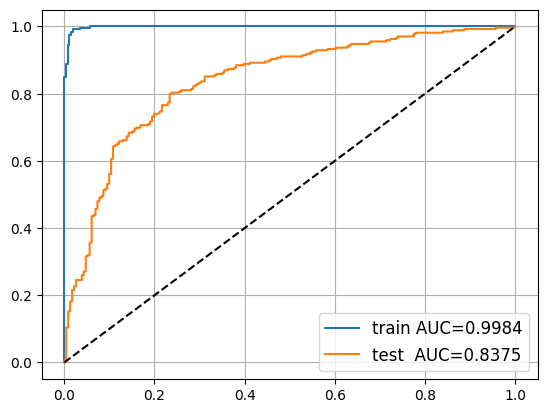

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_bow, y_train, bow_model),
    ('test ', X_test_bow, y_test, bow_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(bow_model.predict(X_test_bow) == y_test)
print(f"Model accuracy: {test_accuracy:.3f}")
assert test_accuracy > 0.77, "Hint: tune the parameter C to improve performance"
print("Well done!")

#extra rough work to tuned c

In [ ]:
from sklearn.metrics import accuracy_score

proba_test = bow_model.predict_proba(X_test_bow)[:, 1]

best_acc, best_thr = 0, 0
for thr in np.linspace(0, 1, 101):
    preds = (proba_test >= thr).astype(int)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc, best_thr = acc, thr

print(f"Best accuracy = {best_acc:.3f} at threshold = {best_thr:.2f}")


Best accuracy = 0.774 at threshold = 0.26


In [ ]:
for c in [0.1, 1, 5, 10, 20, 50, 100]:
    model = LogisticRegression(max_iter=2000, random_state=42, C=c)
    model.fit(X_train_bow, y_train)
    acc = model.score(X_test_bow, y_test)
    print(f"C={c}: test accuracy = {acc:.3f}")


C=0.1: test accuracy = 0.770
C=1: test accuracy = 0.764
C=5: test accuracy = 0.760
C=10: test accuracy = 0.760
C=20: test accuracy = 0.762
C=50: test accuracy = 0.758
C=100: test accuracy = 0.762


In [ ]:
c_grid = [0.02, 0.03, 0.05, 0.07, 0.08, 0.09, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.25, 0.30]
for c in c_grid:
    model = LogisticRegression(max_iter=2000, random_state=42, C=c, solver='liblinear')
    model.fit(X_train_bow, y_train)
    acc = model.score(X_test_bow, y_test)
    print(f"C={c}: test accuracy = {acc:.3f}")


C=0.02: test accuracy = 0.760
C=0.03: test accuracy = 0.760
C=0.05: test accuracy = 0.764
C=0.07: test accuracy = 0.768
C=0.08: test accuracy = 0.768
C=0.09: test accuracy = 0.764
C=0.1: test accuracy = 0.768
C=0.12: test accuracy = 0.770
C=0.14: test accuracy = 0.772
C=0.16: test accuracy = 0.770
C=0.18: test accuracy = 0.772
C=0.2: test accuracy = 0.774
C=0.25: test accuracy = 0.770
C=0.3: test accuracy = 0.768


### Task: implement TF-IDF features (1 point)

Not all words are equally useful. One can prioritize rare words and downscale words like "and"/"or" by using __tf-idf features__. This abbreviation stands for __text frequency/inverse document frequency__ and means exactly that:

$$ \text{feature}_i = \frac{\text{Count}(word_i \in x)}{\text{Total number of words in } x} \times \log\left(\frac{N}{\text{Count}(word_i \in D) + \alpha}\right) $$


, where x is a single text, D is your dataset (a collection of texts), N is a total number of documents and $\alpha$ is a smoothing hyperparameter (typically 1).
And $Count(word_i \in D)$ is the number of documents where $word_i$ appears.

It may also be a good idea to normalize each data sample after computing tf-idf features.

__Your task:__ implement tf-idf features, train a model and evaluate ROC curve. Compare it with basic BagOfWords model from above.

Please don't use sklearn/nltk built-in tf-idf vectorizers in your solution :) You can still use 'em for debugging though.

In [ ]:
from collections import Counter, defaultdict

# total number of documents
N = len(texts_train)

# document frequency (how many docs each word appears in)
doc_freq = defaultdict(int)
for text in texts_train:
    unique_tokens = set(text.split())
    for tok in unique_tokens:
        if tok in bow_vocabulary:
            doc_freq[tok] += 1


In [ ]:
def text_to_tfidf(text, alpha=1.0):
    tokens = text.split()
    token_counts = Counter(tokens)
    total_tokens = len(tokens)

    vector = []
    for tok in bow_vocabulary:
        tf = token_counts.get(tok, 0) / total_tokens if total_tokens > 0 else 0
        idf = np.log((N + alpha) / (doc_freq.get(tok, 0) + alpha))
        vector.append(tf * idf)

    return np.array(vector, dtype='float32')


In [ ]:
X_train_tfidf = np.stack([text_to_tfidf(t) for t in texts_train])
X_test_tfidf = np.stack([text_to_tfidf(t) for t in texts_test])

# normalize each row (L2 norm = 1)
X_train_tfidf = X_train_tfidf / (np.linalg.norm(X_train_tfidf, axis=1, keepdims=True) + 1e-10)
X_test_tfidf = X_test_tfidf / (np.linalg.norm(X_test_tfidf, axis=1, keepdims=True) + 1e-10)


In [ ]:
X_train_tfidf = np.stack([text_to_tfidf(t) for t in texts_train])
X_test_tfidf = np.stack([text_to_tfidf(t) for t in texts_test])

# normalize each row (L2 norm = 1)
X_train_tfidf = X_train_tfidf / (np.linalg.norm(X_train_tfidf, axis=1, keepdims=True) + 1e-10)
X_test_tfidf = X_test_tfidf / (np.linalg.norm(X_test_tfidf, axis=1, keepdims=True) + 1e-10)


Model accuracy with TF-IDF: 0.702


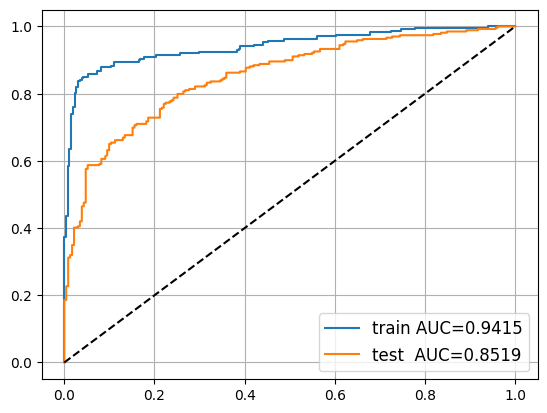

In [ ]:
tfidf_model = LogisticRegression(max_iter=2000, random_state=42, C=0.1)
tfidf_model.fit(X_train_tfidf, y_train)

from sklearn.metrics import roc_auc_score, roc_curve

for name, X, y, model in [
    ('train', X_train_tfidf, y_train, tfidf_model),
    ('test ', X_test_tfidf, y_test, tfidf_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black')
plt.legend(fontsize='large')
plt.grid()

test_accuracy = np.mean(tfidf_model.predict(X_test_tfidf) == y_test)
print(f"Model accuracy with TF-IDF: {test_accuracy:.3f}")


###For exploration: I include threshold tuning in a separate cell as I can see that the  accuracy also improves to 0.77 when threshold is tuned.

In [ ]:
from sklearn.metrics import accuracy_score

proba_test = tfidf_model.predict_proba(X_test_tfidf)[:, 1]

best_acc, best_thr = 0, 0
for thr in np.linspace(0, 1, 101):
    preds = (proba_test >= thr).astype(int)
    acc = accuracy_score(y_test, preds)
    if acc > best_acc:
        best_acc, best_thr = acc, thr

print(f"Best TF-IDF accuracy = {best_acc:.3f} at threshold = {best_thr:.2f}")


Best TF-IDF accuracy = 0.772 at threshold = 0.48


Scroll down when you're done with TF-IDF!
```

```

```

```

```

```

```

```

```

```

```

```

```

```

```

```


### Solving it better: word vectors (1 point)

Let's try another approach: instead of counting per-word frequencies, we shall map all words to pre-trained word vectors and average over them to get text features.

This should give us two key advantages: (1) we now have 10^2 features instead of 10^4 and (2) our model can generalize to word that are not in training dataset.

We begin with a standard approach with pre-trained word vectors. However, you may also try
* training embeddings from scratch on relevant (unlabeled) data
* multiplying word vectors by inverse word frequency in dataset (like tf-idf).
* concatenating several embeddings
    * call `gensim.downloader.info()['models'].keys()` to get a list of available models
* clusterizing words by their word-vectors and try bag of cluster_ids

__Note:__ loading pre-trained model may take a while. It's a perfect opportunity to refill your cup of tea/coffee and grab some extra cookies. Or binge-watch some tv series if you're slow on internet connection

In [ ]:
import gensim.downloader
embeddings = gensim.downloader.load("fasttext-wiki-news-subwords-300")

# If you're low on RAM or download speed, use "glove-wiki-gigaword-100" instead. Ignore all further asserts.

[==================================================] 100.0% 958.5/958.4MB downloaded


In [ ]:
def vectorize_sum(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = embeddings.vectors.shape[1]
    features = np.zeros([embedding_dim], dtype='float32')

    tokens = comment.split()
    for tok in tokens:
        if tok in embeddings:   # check token exists in pre-trained vocab
            features += embeddings[tok]

    return features

assert np.allclose(
    vectorize_sum("who cares anymore . they attack with impunity .")[::70],
    np.array([ 0.0108616 ,  0.0261663 ,  0.13855131, -0.18510573, -0.46380025])
)

In [ ]:
X_train_wv = np.stack([vectorize_sum(text) for text in texts_train])
X_test_wv = np.stack([vectorize_sum(text) for text in texts_test])

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


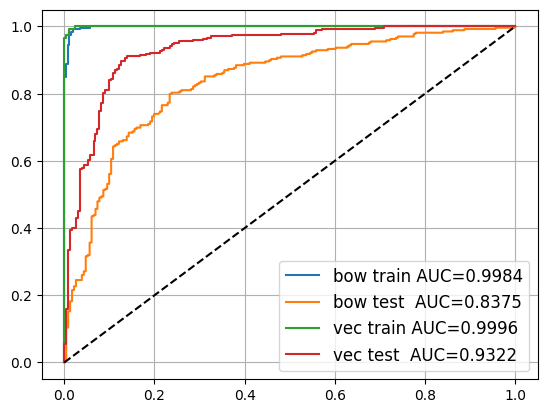

In [ ]:
wv_model = LogisticRegression().fit(X_train_wv, y_train)

for name, X, y, model in [
    ('bow train', X_train_bow, y_train, bow_model),
    ('bow test ', X_test_bow, y_test, bow_model),
    ('vec train', X_train_wv, y_train, wv_model),
    ('vec test ', X_test_wv, y_test, wv_model)
]:
    proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, proba)
    plt.plot(*roc_curve(y, proba)[:2], label='%s AUC=%.4f' % (name, auc))

plt.plot([0, 1], [0, 1], '--', color='black',)
plt.legend(fontsize='large')
plt.grid()

assert roc_auc_score(y_test, wv_model.predict_proba(X_test_wv)[:, 1]) > 0.92, "something's wrong with your features"

If everything went right, you've just managed to reduce misclassification rate by a factor of two.
This trick is very useful when you're dealing with small datasets. However, if you have hundreds of thousands of samples, there's a whole different range of methods for that. We'll get there in the second part.

**Would you like to know more?**
* See what other embeddings are there in the model zoo: `gensim.downloader.info()`
* Take a look at [FastText embeddings](https://github.com/facebookresearch/fastText)